## WW2 Aircraft
### A Dataset of WW2 Aircraft Models

#### Content
This dataset contains information about the planes of World War II. It is made up of 15 variables.

The dataset is prepared by Weimar

Here is the dataset link : https://www.kaggle.com/iskk97/ww2-aircraft

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of  Columns in Both Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Converting ActiveSince,LastBuilt and Retired columns to int in the dataframe</a></li>
      <li><a href="#part3-2">3.2 Defining show_values_on_bars function to show values on both vertical and horizontal bar</a></li> 
      <li><a href="#part3-3">3.3 Define a function to show radar chart</a></li> 
      <li><a href="#part3-4">3.4 Define function to show all values in the table</a></li> 
      <li><a href="#part3-5">3.5 Change some countries' name in Country column of Country flag dataframe </a></li>
      <li><a href="#part3-6">3.6 Insert Flag Url to each dataframe</a></li>
      <li><a href="#part3-7">3.7 Define funtions to show country flag in Bar Graph</a></li> 
      <li><a href="#part3-8">3.8 Defining drawnestedpiegraph function to show nested pie graph</a></li>  
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Define bar graph showing the total count by PrimaryRole</a></li>
      <li><a href="#part4-2">4.2 Define bar graph showing the total count of WW2 warplane by PrimaryRole and Country</a></li>
      <li><a href="#part4-3">4.3 Define bar graph showing the number of WW2 warplane by Country</a></li>
      <li><a href="#part4-4">4.4 Define timeline to show the total number of WW2 warplane was built by Year</a></li> 
      <li><a href="#part4-5">4.5 Define timeline to show the total number of WW2 warplane was built by Year at last</a></li> 
      <li><a href="#part4-6">4.6 Define a bar graph to show the longest usage of WW2 warplanes</a></li>  
      <li><a href="#part4-7">4.7 Define a nested pie graph to determine which the number of WW2 warplane were retired according to PrimaryRole</a></li> 
      <li><a href="#part4-8">4.8 Define 3x2 grid tables to show the top 10 of WW2 warplane's features by Crew, Length , Wingspan , Height and WingArea</a></li>
      <li><a href="#part4-9">4.9 Define a radar chart to show the top 5 fastest of WW2 warplane by Crew, Length , Wingspan , Height and WingArea</a></li>
      <li><a href="#part4-10">4.10 Define a sunburst graph to make a correlation among essential features of WW2 warplanes</a></li> 
      <li><a href="#part4-11">4.11 Draw a WordCloud to show the names of WW2 warplanes</a></li> 
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.io as pio
import random
import datetime
import matplotlib.colors as mcolors
import six
import requests
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

plt.style.use('seaborn')

2 - Define dataframe for WW2 Aircraft and Country Flags after loading all values from csv file and assigning them to it

In [52]:
file_location_url = "files/ww2aircraft.csv";

ww2aircraft_df = pd.read_csv(file_location_url, 
                             error_bad_lines=False,
                             warn_bad_lines = False,
                             sep = ";",
                             encoding = "utf-8")


country_flags_dataset = "files/country_flags.csv"
country_flags_df = pd.read_csv(country_flags_dataset, error_bad_lines=False ,sep = ',', encoding = "ISO-8859-1")

3 - Deterime how many rows and columns are defined in the dataframe

In [53]:
row_count = ww2aircraft_df.shape[0]
column_count = ww2aircraft_df.shape[1]

print("WW2 Aircraft -- Row : {} , Column : {}".format(row_count,column_count))

WW2 Aircraft -- Row : 338 , Column : 15


4 - Show first 5 values of the dataframe

In [54]:
ww2aircraft_df.head()

,Name,PrimaryRole,Manufacturer,Country,Number,ActiveSince,LastBuilt,Retired,State,Crew,Length,Wingspan,Height,WingArea,MaxSpeed
0,130,Seaplane,"Loire Aviation, Saint-Nazaire, France",France,125.0,1937.0,1942.0,1951.0,Retired,3,11.3,16,3.58,38.17,220.0
1,143,Medium Bomber,Avions Amiot,France,138.0,1935.0,1937.0,1944.0,Retired,5,18.24,24.53,5.68,100.00,295.0
2,2MB1,Light Bomber,Mitsubishi Heavy Industries,Japan,48.0,1926.0,NaN,1931.0,Retired,2,10,14.8,3.63,60.00,185.0
3,2MR8,Reconnaissance Aircraft,Mitsubishi Heavy Industries,Japan,234.0,1932.0,1936.0,1938.0,Retired,2,8.52,12.75,3.48,26.00,220.0
4,351/354,Medium Bomber,Avions Amiot,France,86.0,1939.0,1940.0,1940.0,Retired,4,14.5,22.83,4.08,67.00,480.0


5 - Show last 5 values of the dataframe

In [55]:
ww2aircraft_df.tail()

,Name,PrimaryRole,Manufacturer,Country,Number,ActiveSince,LastBuilt,Retired,State,Crew,Length,Wingspan,Height,WingArea,MaxSpeed
333,YO-51 Dragonfly,Prototype Aircraft,Ryan Aeronautical Company,United States,3.0,NaN,1940.0,NaN,Cancelled,2,10.82,16,3.38,NaN,208.0
334,York,Transport,A. V. Roe & Company,United Kingdom,258.0,1943.0,1948.0,1964.0,Retired,5,23.93,31.09,5.03,120.50,480.0
335,Z.1007 Alcione,Medium Bomber,Cantiere Navale Triestino,Italy,660.0,1939.0,1943.0,1944.0,Retired,5,18.35,24.8,5.22,70.00,458.0
336,Z.501 Gabbiano,Seaplane,Cantiere Navale Triestino,Italy,454.0,1934.0,1943.0,1950.0,Retired,5,14.3,22.5,4.40,62.00,275.0
337,Z.506 Airone,Seaplane,Cantiere Navale Triestino,Italy,316.0,1936.0,1943.0,1959.0,Retired,5,19.24,26.5,7.45,86.26,350.0


6 - Show each column information of the dataframe

In [56]:
ww2aircraft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          338 non-null    object 
 1   PrimaryRole   338 non-null    object 
 2   Manufacturer  337 non-null    object 
 3   Country       338 non-null    object 
 4   Number        337 non-null    float64
 5   ActiveSince   324 non-null    float64
 6   LastBuilt     284 non-null    float64
 7   Retired       311 non-null    float64
 8   State         338 non-null    object 
 9   Crew          338 non-null    int64  
 10  Length        336 non-null    object 
 11  Wingspan      337 non-null    object 
 12  Height        333 non-null    float64
 13  WingArea      331 non-null    float64
 14  MaxSpeed      338 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 39.7+ KB


7 - Show how many variables there are in the dataframe

In [57]:
ww2aircraft_df.count()

Name            338
PrimaryRole     338
Manufacturer    337
Country         338
Number          337
ActiveSince     324
LastBuilt       284
Retired         311
State           338
Crew            338
Length          336
Wingspan        337
Height          333
WingArea        331
MaxSpeed        338
dtype: int64

8 - Show descriptive statistics of each dataframe

In [58]:
ww2aircraft_df.describe()

,Number,ActiveSince,LastBuilt,Retired,Crew,Height,WingArea,MaxSpeed
count,337.000000,324.000000,284.000000,311.000000,338.000000,333.000000,331.000000,338.000000
mean,2362.575668,1938.990741,1943.394366,1948.929260,2.893491,4.444210,52.141695,438.531657
std,4611.239507,3.831987,6.071957,9.207718,2.426465,3.004801,53.718830,159.366193
min,1.000000,1924.000000,1932.000000,1931.000000,1.000000,1.160000,3.600000,125.000000
25%,134.000000,1937.000000,1940.750000,1945.000000,1.000000,3.250000,21.910000,317.500000
50%,541.000000,1940.000000,1944.000000,1945.000000,2.000000,3.880000,32.400000,430.000000
75%,1931.000000,1942.000000,1945.000000,1952.000000,4.000000,4.791000,59.000000,545.750000
max,36163.000000,1945.000000,2009.000000,1995.000000,14.000000,32.068000,486.200000,970.000000


9 - Determine if null values of each column are in each dataframe

In [59]:
ww2aircraft_df.isnull().sum()

Name             0
PrimaryRole      0
Manufacturer     1
Country          0
Number           1
ActiveSince     14
LastBuilt       54
Retired         27
State            0
Crew             0
Length           2
Wingspan         1
Height           5
WingArea         7
MaxSpeed         0
dtype: int64

10 - Show unique values of Country in the Dataframe

In [60]:
ww2aircraft_df["Country"].unique()

array(['France', 'Japan', 'United States', 'United Kingdom', 'Germany',
       'Czechoslovakia', 'Italy', 'Russia', 'Australia', 'China',
       'Canada', 'Netherlands', 'Romania', 'Yugoslavia', 'Poland'],
      dtype=object)

<a id='part2'></a>
## 2. Description of  Columns in Both Dataframe

In [61]:
values = [
  ['Name', 
   'PrimaryRole', 
   'Manufacturer',
   'Country',
   'Number',
   'ActiveSince',
   'LastBuilt',
   'Retired',
   'State',
   'Crew',
   'Length',
   'Wingspan',
   'Height',
   'WingArea',
   'MaxSpeed',
  ],  #1st col
  ["The name of WW2 warplane", 
   "The primary role of WW2 warplane",
   "The manufacturer name of WW2 warplane",  
   "What country the plane was built",
   "The number of WW2 warplane production",
   "What year WW2 warplane has been used onwards",
   "What year WW2 warplane was retired",
   "The retired year of WW2 warplane",
   "The state of WW2 warplane",
   "The crew capacity of WW2 warplane",
   "The length of WW2 warplane",
   "The wingspan length of WW2 warplane",
   "The height of WW2 warplane",
   "The wing area of WW2 warplane",
   "The max speed of WW2 warplane which WW2 warplane could reach",
  ] #2nd col
] 

layout = go.Layout(title="A Description of Columns in the Dataframe", 
                   height=700, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,400],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='black',
    fill_color='darkgoldenrod',
    align=['left','center'],
    font=dict(color='white', size=16),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['goldenrod', 'bisque']),
    align=['left', 'left'],
    font_size=13,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Converting ActiveSince,LastBuilt and Retired columns to int in the dataframe

In [62]:
ww2aircraft_df['ActiveSince'] = ww2aircraft_df['ActiveSince'].replace(np.nan, 0)
ww2aircraft_df['LastBuilt'] = ww2aircraft_df['LastBuilt'].replace(np.nan, 0)
ww2aircraft_df['Retired'] = ww2aircraft_df['Retired'].replace(np.nan, 0)

ww2aircraft_df["ActiveSince"] = ww2aircraft_df['ActiveSince'].astype(int)
ww2aircraft_df["LastBuilt"] = ww2aircraft_df['LastBuilt'].astype(int)
ww2aircraft_df["Retired"] = ww2aircraft_df['Retired'].astype(int)

<a id='part3-2'></a>
### 3.2 Defining show_values_on_bars function to show values on both vertical and horizontal bar

In [63]:
def show_values_on_bars(axs, h_v="v", space= 0.4):
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                value = 0
                if not np.isnan(p.get_height()):
                    if type(p.get_height()) is int:
                        value = int(p.get_height())
                    else:
                        value = float(p.get_height())
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + value
                
                ax.text(_x, _y, value, ha="center", fontsize=18) 
        elif h_v == "h":
            for p in ax.patches:                
                value = 0
                if not np.isnan(p.get_width()):
                    if type(p.get_width()) is int:
                        value = int(p.get_width())
                    else:
                        value = float(p.get_width())
                _x = p.get_x() + p.get_width()
                _y = p.get_y() + p.get_height() - float(space) 
                ax.text(_x, _y, value, ha="left", fontsize=18)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

<a id='part3-3'></a>
### 3.3 Define a function to show radar chart

In [64]:
def radar_chart(values=[]):

    labels=np.array(['Crew',
                     'Length',
                     'Wingspan',
                     'Height',
                     'WingArea'
                    ]
                   )
    
    
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    #print(angles)

    fig=plt.figure(figsize=(24,12))
    #plt.suptitle(title, y=1.04)
    for v in values:
        stats=np.array(ww2aircraft_df[ww2aircraft_df["Name"]==v][labels])[0]
        #print(stats)
        ax = fig.add_subplot(121, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2, label = v)
        ax.fill(angles, stats, alpha=0.25)
        ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=16)
        
    ax.set_rgrids([5, 10, 15, 20, 25, 30],fontsize=16)    
    ax.tick_params(axis='both', which='major', pad=25)
    ax.grid(True)
    #plt.legend(loc="upper right",bbox_to_anchor=(1.2,1.0))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
      fancybox=True, shadow=True, ncol=1, fontsize=16)

<a id='part3-4'></a>
### 3.4 Define function to show all values in the table

In [65]:
def render_mpl_table(data, title = "",col_width=3.0,image_path = "", row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs, cellLoc='center')

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    mpl_table.auto_set_column_width(col=list(range(len(data.columns))))

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(image_path)
    plt.show()
    return ax

<a id='part3-5'></a>
### 3.5 Change some countries' name in Country column of Country flag dataframe

In [66]:
# Russian Federation

replacements = {'Russian Federation':'Russia'}

country_flags_df['Country Name'] = country_flags_df['Country Name'].replace(replacements)

<a id='part3-6'></a>
### 3.6 Insert Flag Url to each dataframe

In [67]:
countries_list = ww2aircraft_df['Country'].unique()

flags_unk_1 = []
for cnt in countries_list:
    flag = country_flags_df[country_flags_df['Country Name']==cnt]['Image URL']
    flag = list(flag)
    if flag:
        index = ww2aircraft_df[ww2aircraft_df['Country']==cnt].index
        ww2aircraft_df.at[index,'Country_Flag_URL']=flag[0]
    else:
        flags_unk_1.append(cnt)

In [68]:
ww2aircraft_df.head()

,Name,PrimaryRole,Manufacturer,Country,Number,ActiveSince,LastBuilt,Retired,State,Crew,Length,Wingspan,Height,WingArea,MaxSpeed,Country_Flag_URL
0,130,Seaplane,"Loire Aviation, Saint-Nazaire, France",France,125.0,1937,1942,1951,Retired,3,11.3,16,3.58,38.17,220.0,http://www.countryflags.org/flags/fr-t.gif
1,143,Medium Bomber,Avions Amiot,France,138.0,1935,1937,1944,Retired,5,18.24,24.53,5.68,100.00,295.0,http://www.countryflags.org/flags/fr-t.gif
2,2MB1,Light Bomber,Mitsubishi Heavy Industries,Japan,48.0,1926,0,1931,Retired,2,10,14.8,3.63,60.00,185.0,http://www.countryflags.org/flags/ja-t.gif
3,2MR8,Reconnaissance Aircraft,Mitsubishi Heavy Industries,Japan,234.0,1932,1936,1938,Retired,2,8.52,12.75,3.48,26.00,220.0,http://www.countryflags.org/flags/ja-t.gif
4,351/354,Medium Bomber,Avions Amiot,France,86.0,1939,1940,1940,Retired,4,14.5,22.83,4.08,67.00,480.0,http://www.countryflags.org/flags/fr-t.gif


<a id='part3-7'></a>
### 3.7 Define funtions to show country flag in Bar Graph

In [69]:
def get_flag(name):
    r = requests.get(name,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    country_pic = Image.open(r.raw).convert('RGB') #plt.imread(r.raw)
    return country_pic

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

<a id='part3-8'></a>
### 3.8 Defining drawnestedpiegraph function to show nested pie graph

In [70]:
def drawnestedpiegraph(outer,inner,labels,pieTitle,filename):

    fig, ax = plt.subplots(figsize=(30,15))
    size = 0.3
    
    colors_1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = outer.size)
    colors_2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = inner.size)

    ax.pie(outer.values.flatten(), radius=1,
           labels=outer.index,
           autopct='%1.1f%%',
           pctdistance=1.1, labeldistance=1.2,
           textprops={'fontsize': 14},
           colors = colors_1,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(inner.values.flatten(), radius=1-size, 
           labels = labels,
           autopct='%1.1f%%',
           pctdistance=0.5, labeldistance=0.6,
           textprops={'fontsize': 12},
           colors = colors_2,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.set(aspect="equal")
    ax.set_title(pieTitle, fontsize = 20)
    plt.savefig('images/' + filename, bbox_inches = "tight")
    plt.show()

<a id='part4'></a>
### 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Define bar graph showing the total count of WW2 warplane by PrimaryRole and Manufacturer

In [71]:
ww2aircraft_df_PrimaryRole_Manufacturer = ww2aircraft_df.groupby(['Manufacturer','PrimaryRole']).size() \
                             .reset_index() \
                             .pivot(columns='Manufacturer', index='PrimaryRole', values=0)

In [72]:
ww2aircraft_df_PrimaryRole_Manufacturer["Sum"] = ww2aircraft_df_PrimaryRole_Manufacturer.sum(axis=1)

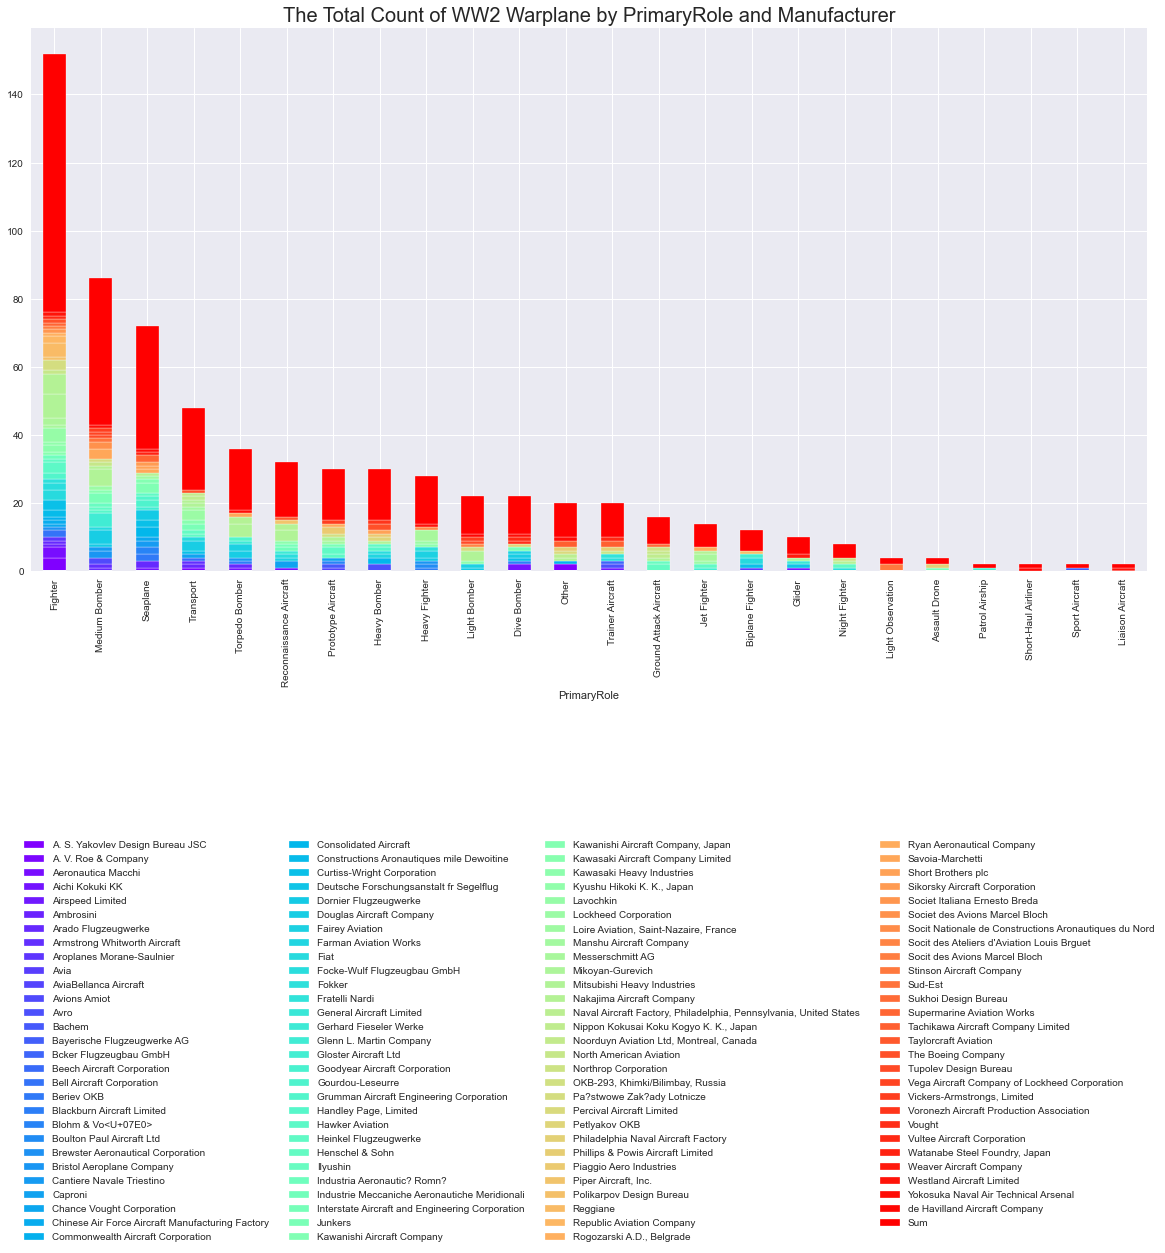

In [73]:
ax = ww2aircraft_df_PrimaryRole_Manufacturer.sort_values('Sum', ascending=False).plot(kind='bar', stacked=True,figsize=(20,10), colormap='rainbow')
plt.title('The Total Count of WW2 Warplane by PrimaryRole and Manufacturer', fontsize=20) 
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -1.25),
          ncol=4, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('images/image2.png', bbox_inches = "tight")  
plt.show()

<a id='part4-2'></a>
### 4.2 Define bar graph showing the total count of WW2 warplane by PrimaryRole and Country

In [74]:
ww2aircraft_df_PrimaryRole_Country = ww2aircraft_df.groupby(['Country','PrimaryRole']).size() \
                             .reset_index() \
                             .pivot(columns='Country', index='PrimaryRole', values=0)

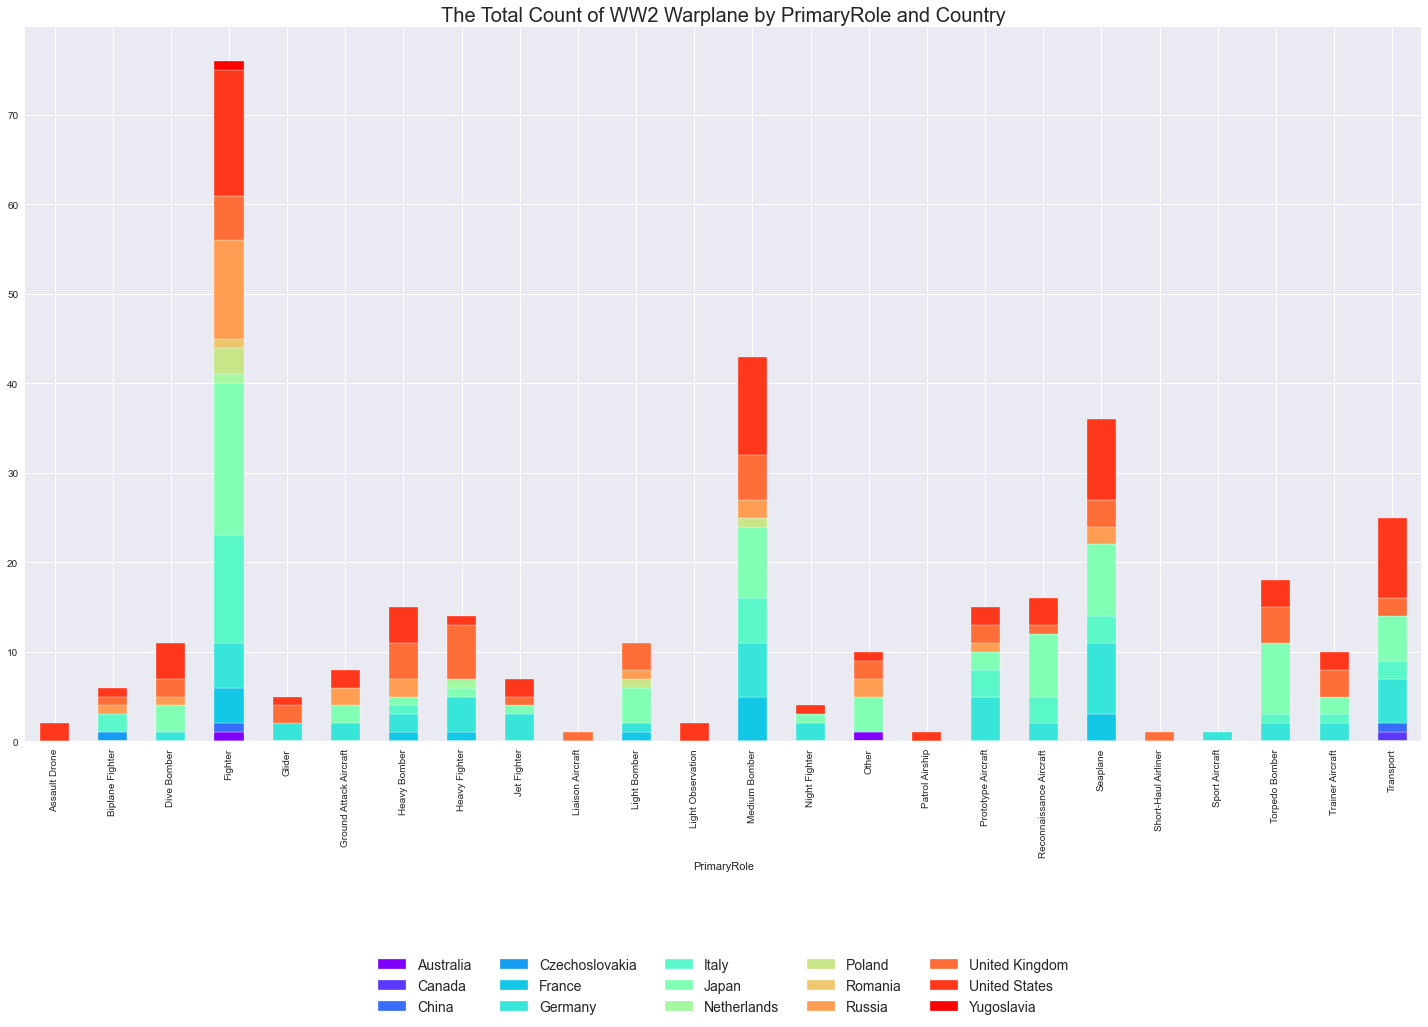

In [75]:
ax = ww2aircraft_df_PrimaryRole_Country.plot(kind='bar', stacked=True,figsize=(20,15), colormap='rainbow')
plt.title('The Total Count of WW2 Warplane by PrimaryRole and Country', fontsize=20) 
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4),
          ncol=5, fancybox=True, shadow=True, prop={'size': 14})
plt.tight_layout()
plt.savefig('images/image3.png', bbox_inches = "tight")  
plt.show()

<a id='part4-3'></a>
### 4.3 Define bar graph showing the number of WW2 warplane by Country

In [76]:
ww2aircraft_df_Country = ww2aircraft_df[['Country', 'Number','Country_Flag_URL']]
ww2aircraft_df_Country = ww2aircraft_df_Country.groupby(['Country','Country_Flag_URL'])['Number'].sum()

In [77]:
ww2aircraft_df_Country = ww2aircraft_df_Country.reset_index().sort_values('Number', ascending=False)

In [78]:
ww2aircraft_df_Country

,Country,Country_Flag_URL,Number
12,United States,http://www.countryflags.org/flags/us-t.gif,290476.0
10,Russia,http://www.countryflags.org/flags/ru-t.gif,144343.0
11,United Kingdom,http://www.countryflags.org/flags/uk-t.gif,139720.0
4,Germany,http://www.countryflags.org/flags/de-t.gif,120178.0
6,Japan,http://www.countryflags.org/flags/ja-t.gif,74011.0
5,Italy,http://www.countryflags.org/flags/it-t.gif,14429.0
3,France,http://www.countryflags.org/flags/fr-t.gif,8947.0
8,Poland,http://www.countryflags.org/flags/pl-t.gif,1066.0
0,Australia,http://www.countryflags.org/flags/as-t.gif,1005.0
1,Canada,http://www.countryflags.org/flags/ca-t.gif,904.0


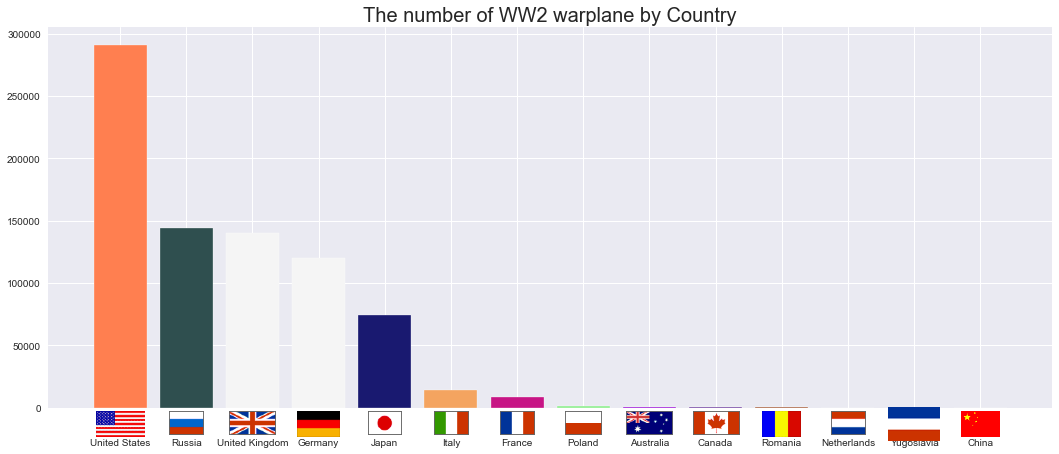

In [79]:
plt.figure(figsize=(18,7))
countries = np.asarray(ww2aircraft_df_Country["Country_Flag_URL"])   

colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = ww2aircraft_df_Country.size)

plt.bar(range(len(countries)), ww2aircraft_df_Country["Number"], color= colors )
plt.gca().set_xticks(range(len(countries)))
plt.gca().set_xticklabels(ww2aircraft_df_Country["Country"])
plt.gca().set_title('The number of WW2 warplane by Country' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=30)
for i, c in enumerate(countries):
    offset_image(i, c, plt.gca())

plt.savefig('images/image4.png')
plt.show();

<a id='part4-4'></a>
### 4.4 Define timeline to show the total number of WW2 warplane was built by Year

In [80]:
ww2aircraft_df_Year = ww2aircraft_df.groupby(['ActiveSince'])['Number'].sum().reset_index()
ww2aircraft_df_Year = ww2aircraft_df_Year[ww2aircraft_df_Year["ActiveSince"] != 0]
ww2aircraft_df_Year["Number"] = ww2aircraft_df_Year["Number"].astype(int)

In [81]:
ww2aircraft_df_Year

,ActiveSince,Number
1,1924,3143
2,1926,291
3,1928,1117
4,1929,3
5,1931,1985
6,1932,1512
7,1933,1934
8,1934,20671
9,1935,10222
10,1936,84517


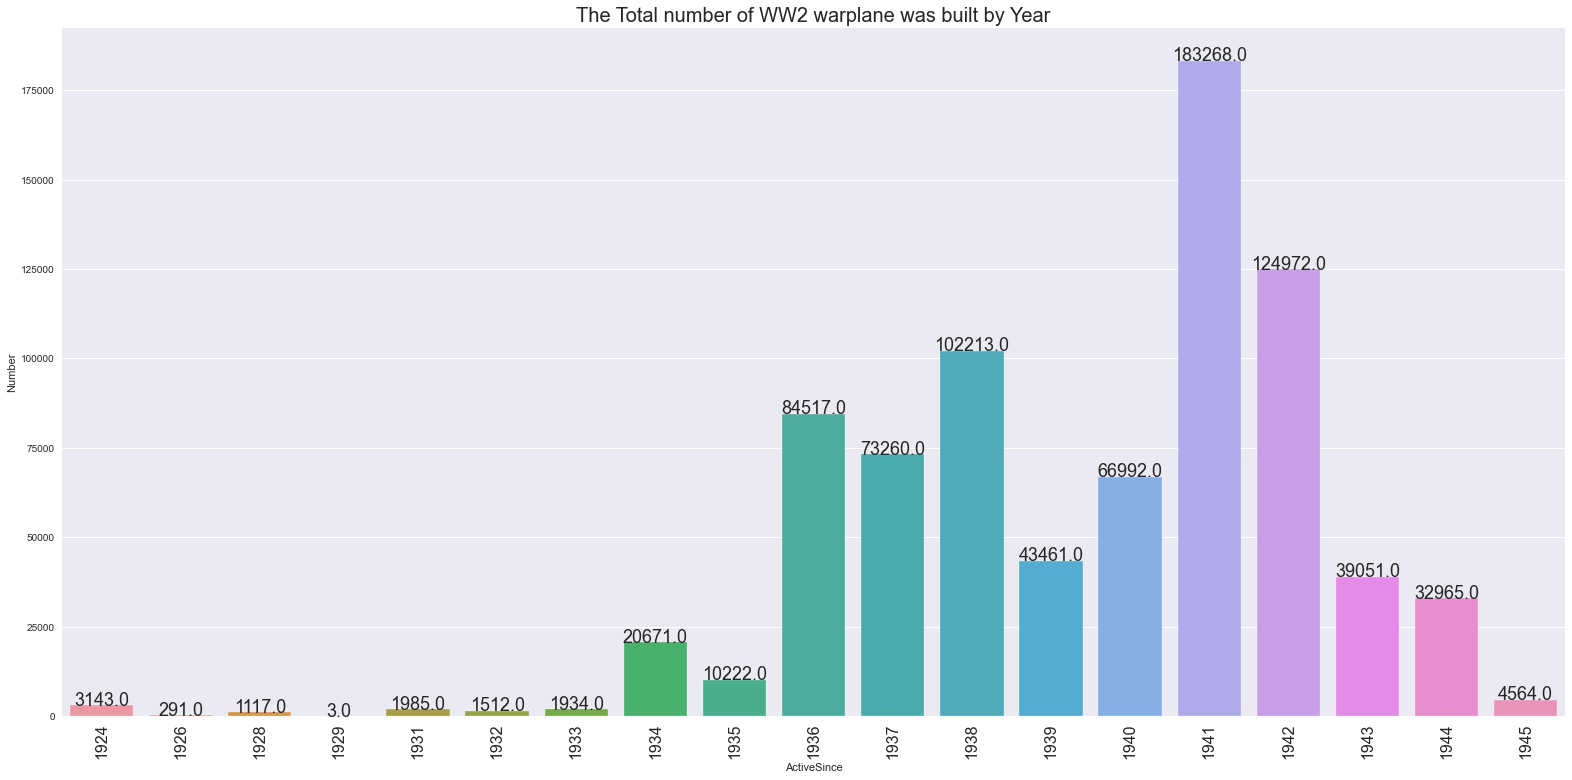

In [82]:
plt.figure(figsize=(22,11))

graph = sns.barplot(data = ww2aircraft_df_Year, x="ActiveSince", y='Number')

show_values_on_bars(graph, "v", 0.3)

plt.xticks(rotation=90, fontsize= 16)
plt.title("The Total number of WW2 warplane was built by Year", fontsize = 20)
plt.savefig('images/image5.png')
plt.tight_layout()
plt.show();

<a id='part4-5'></a>
### 4.5 Define timeline to show the total number of WW2 warplane was built by Year at last

In [83]:
ww2aircraft_df_Last_Built_Year = ww2aircraft_df.groupby(['LastBuilt'])['Number'].sum().reset_index()
ww2aircraft_df_Last_Built_Year = ww2aircraft_df_Last_Built_Year[ww2aircraft_df_Last_Built_Year["LastBuilt"] != 0]
ww2aircraft_df_Last_Built_Year["Number"] = ww2aircraft_df_Last_Built_Year["Number"].astype(int)

In [84]:
ww2aircraft_df_Last_Built_Year

,LastBuilt,Number
1,1932,1120
2,1933,151
3,1934,705
4,1935,594
5,1936,2318
6,1937,5211
7,1938,1017
8,1939,10108
9,1940,10967
10,1941,17053


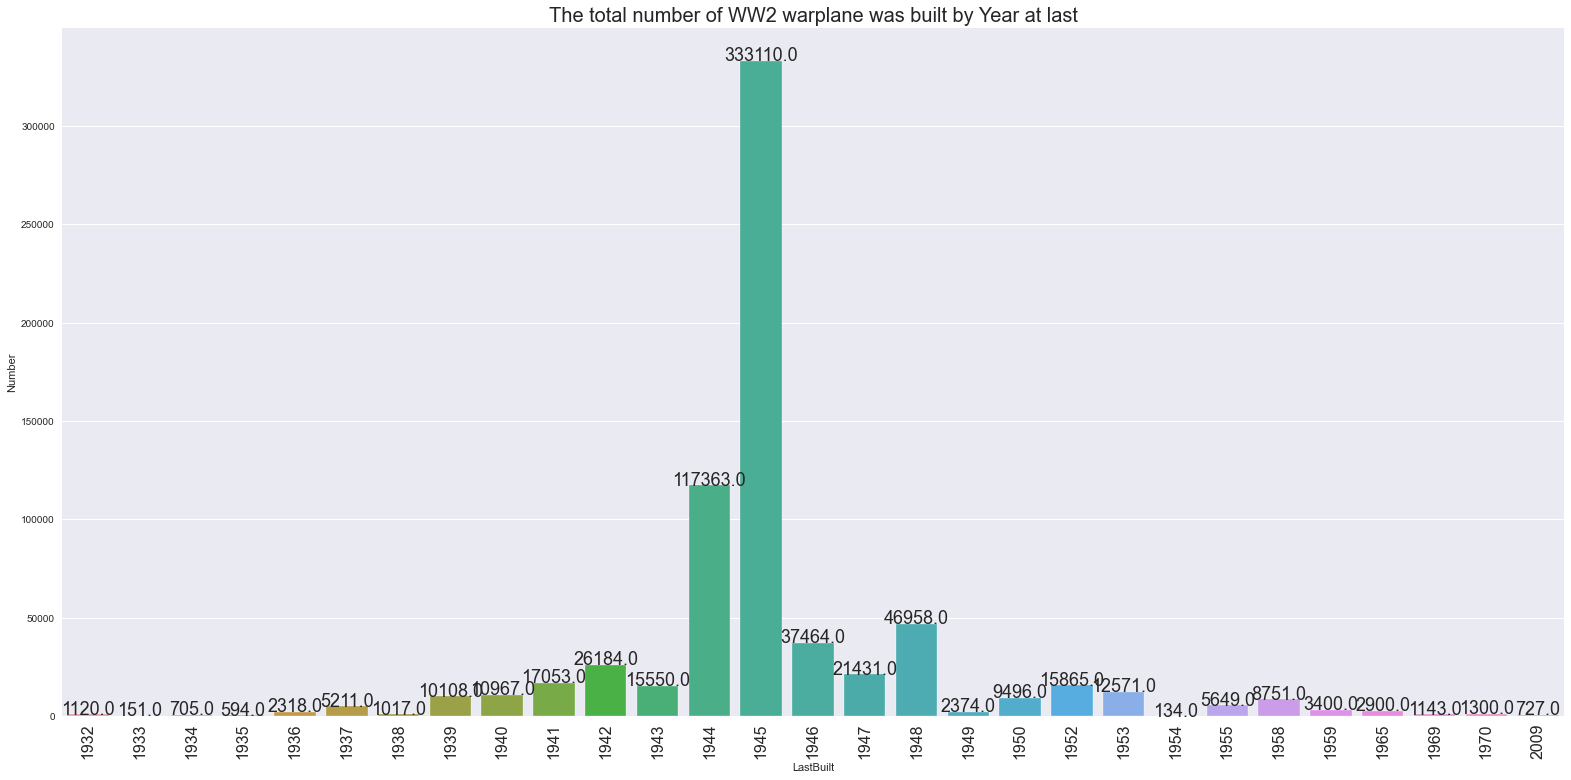

In [85]:
plt.figure(figsize=(22,11))

graph = sns.barplot(data = ww2aircraft_df_Last_Built_Year, x="LastBuilt", y='Number')

show_values_on_bars(graph, "v", 0.3)

plt.xticks(rotation=90, fontsize= 16)
plt.title("The total number of WW2 warplane was built by Year at last", fontsize = 20)
plt.savefig('images/image6.png')
plt.tight_layout()
plt.show();

<a id='part4-6'></a>
### 4.6 Define a bar graph to show the top 10 longest usage of WW2 warplanes

In [86]:
ww2aircraft_df_longest_usage = ww2aircraft_df.copy()
ww2aircraft_df_longest_usage.query('ActiveSince != 0 & Retired != 2')
ww2aircraft_df_longest_usage = ww2aircraft_df_longest_usage[(ww2aircraft_df_longest_usage["Retired"] != 0) \
                                                            & (ww2aircraft_df_longest_usage["ActiveSince"] != 0)]

In [87]:
ww2aircraft_df_longest_usage[ww2aircraft_df_longest_usage["ActiveSince"] == 0]

,Name,PrimaryRole,Manufacturer,Country,Number,ActiveSince,LastBuilt,Retired,State,Crew,Length,Wingspan,Height,WingArea,MaxSpeed,Country_Flag_URL


In [88]:
ww2aircraft_df_longest_usage[ww2aircraft_df_longest_usage["Retired"] == 0]

,Name,PrimaryRole,Manufacturer,Country,Number,ActiveSince,LastBuilt,Retired,State,Crew,Length,Wingspan,Height,WingArea,MaxSpeed,Country_Flag_URL


In [89]:
ww2aircraft_df_longest_usage["Usage_Year"] = ww2aircraft_df_longest_usage["Retired"] - ww2aircraft_df_longest_usage["ActiveSince"]
ww2aircraft_df_longest_usage = ww2aircraft_df_longest_usage[["Name","PrimaryRole","Country","Usage_Year"]]
ww2aircraft_df_longest_usage = ww2aircraft_df_longest_usage[ww2aircraft_df_longest_usage["Usage_Year"] != 0]
ww2aircraft_df_longest_usage = ww2aircraft_df_longest_usage.sort_values(by = "Usage_Year", ascending = False).head(10)

In [90]:
ww2aircraft_df_longest_usage

,Name,PrimaryRole,Country,Usage_Year
26,AT-6 Texan,Trainer Aircraft,United States,58
211,L-18 Lodestar,Transport,United States,50
255,P-51 Mustang,Fighter,United States,42
68,C-45 Expeditor,Transport,United States,39
32,B-25 Mitchell,Medium Bomber,United States,38
113,F4U Corsair,Fighter,United States,37
74,C-75 Stratoliner,Transport,United States,37
314,Tu-2,Medium Bomber,Russia,37
236,Meteor,Jet Fighter,United Kingdom,36
115,Fi 156 Storch,Reconnaissance Aircraft,Germany,33


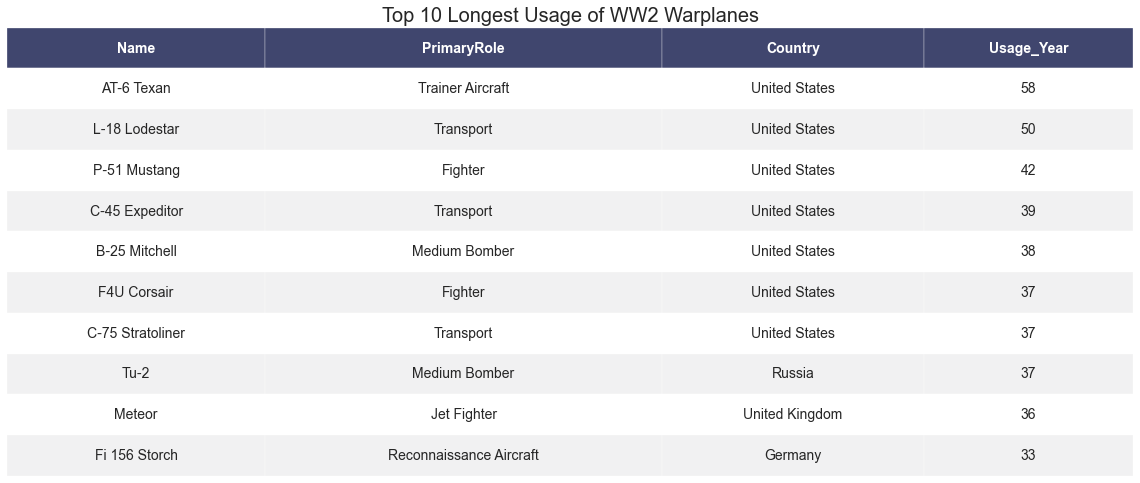

<AxesSubplot:title={'center':'Top 10 Longest Usage of WW2 Warplanes'}>

In [91]:
render_mpl_table(ww2aircraft_df_longest_usage,
                 title = "Top 10 Longest Usage of WW2 Warplanes",
                 header_columns=0,
                 col_width=4.0,
                 image_path = 'images/image7.png')

<a id='part4-7'></a>
### 4.7 Define a nested pie graph to determine which the number of WW2 warplane were retired according to PrimaryRole 

In [92]:
ww2aircraft_df_Name_State = pd.DataFrame({'count' : ww2aircraft_df.groupby(['PrimaryRole','State']).size()}).reset_index()
ww2aircraft_df_Name_State = ww2aircraft_df_Name_State.sort_values(['count'], ascending = False)

ww2aircraft_df_Name_State_outer = ww2aircraft_df_Name_State.groupby('State').sum()
ww2aircraft_df_Name_State_inner = ww2aircraft_df_Name_State.groupby(['State', 'PrimaryRole']).sum()
ww2aircraft_df_Name_State_inner_labels = ww2aircraft_df_Name_State_inner.index.get_level_values(1)

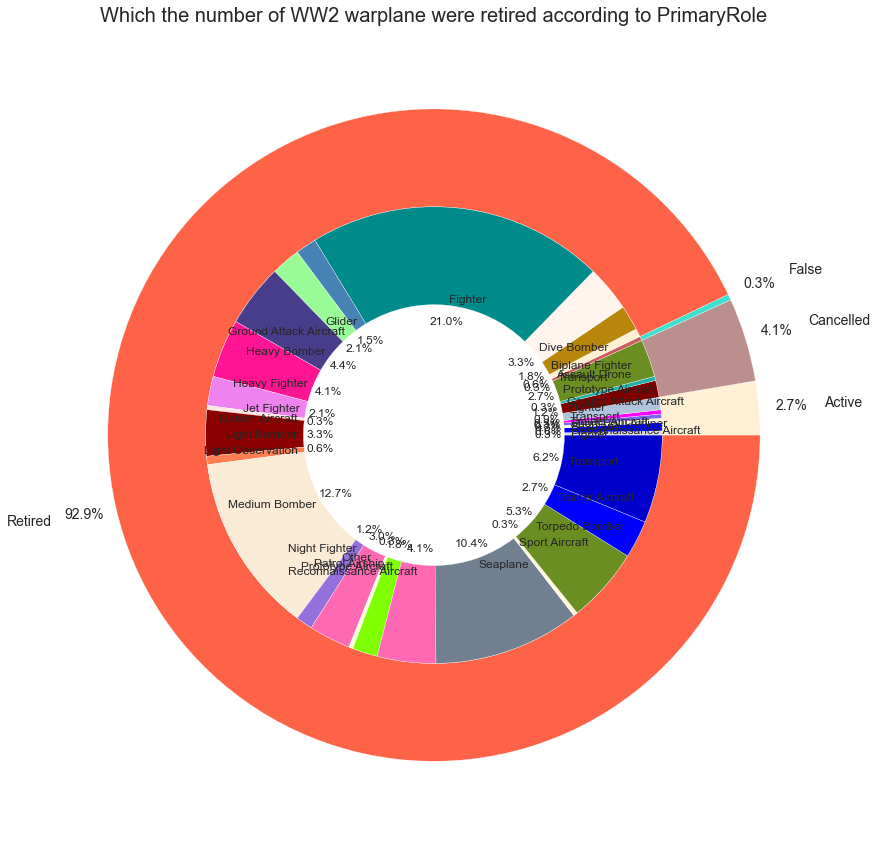

In [93]:
drawnestedpiegraph(ww2aircraft_df_Name_State_outer,
                   ww2aircraft_df_Name_State_inner,
                   ww2aircraft_df_Name_State_inner_labels,
                   "Which the number of WW2 warplane were retired according to PrimaryRole",
                   "image8.png")

<a id='part4-8'></a>
### 4.8 Define 3x2 grid tables to show the top 10 of WW2 warplane's features by Crew, Length , Wingspan , Height and WingArea

In [94]:
ww2aircraft_df_Crew = ww2aircraft_df.sort_values(by="Crew", ascending = False)
ww2aircraft_df_Crew = ww2aircraft_df_Crew[["Name","Crew"]]
ww2aircraft_df_Crew = ww2aircraft_df_Crew[:10]


ww2aircraft_df_Length = ww2aircraft_df.sort_values(by="Length", ascending = False)
ww2aircraft_df_Length = ww2aircraft_df_Length[["Name","Length"]]
ww2aircraft_df_Length = ww2aircraft_df_Length[:10]
ww2aircraft_df_Length["Length"] = ww2aircraft_df_Length["Length"].astype('float')

ww2aircraft_df_Wingspan = ww2aircraft_df.sort_values(by="Wingspan", ascending = False)
ww2aircraft_df_Wingspan = ww2aircraft_df_Wingspan[["Name","Wingspan"]]
ww2aircraft_df_Wingspan = ww2aircraft_df_Wingspan[:10]
ww2aircraft_df_Wingspan["Wingspan"] = ww2aircraft_df_Wingspan["Wingspan"].astype('float')

ww2aircraft_df_Height = ww2aircraft_df.sort_values(by="Height", ascending = False)
ww2aircraft_df_Height = ww2aircraft_df_Height[["Name","Height"]]
ww2aircraft_df_Height = ww2aircraft_df_Height[:10]
ww2aircraft_df_Height["Height"] = ww2aircraft_df_Height["Height"].astype('float')

ww2aircraft_df_WingArea = ww2aircraft_df.sort_values(by="WingArea", ascending = False)
ww2aircraft_df_WingArea = ww2aircraft_df_WingArea[["Name","WingArea"]]
ww2aircraft_df_WingArea = ww2aircraft_df_WingArea[:10]
ww2aircraft_df_WingArea["WingArea"] = ww2aircraft_df_WingArea["WingArea"].astype('float')

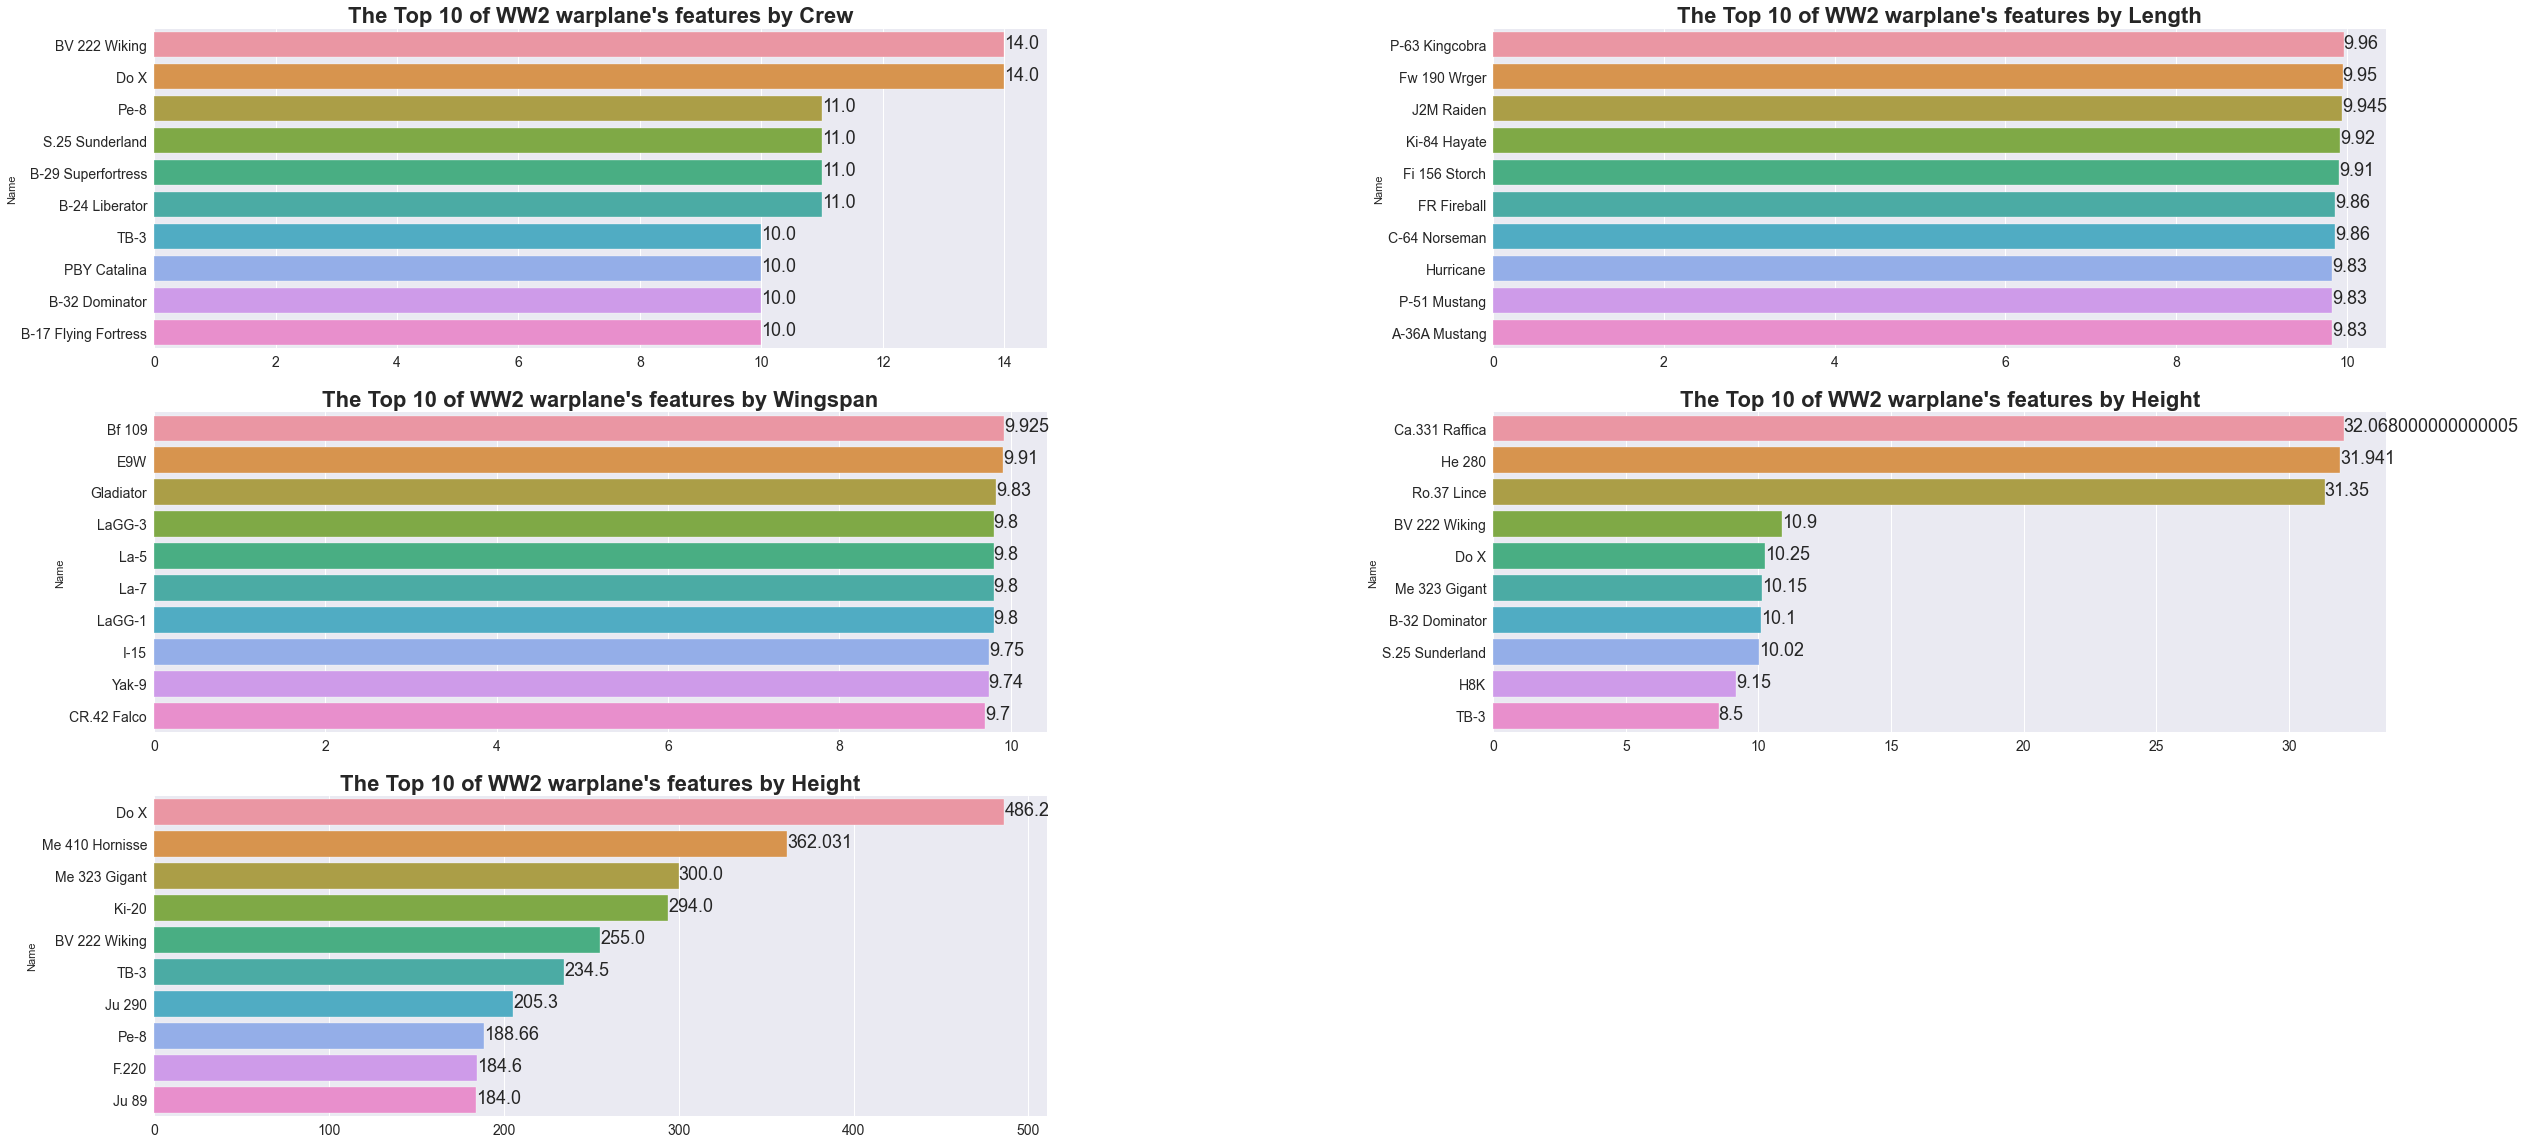

In [95]:
f,a = plt.subplots(3,2,figsize=(40,20))
f.subplots_adjust(wspace = .5)

graph_1 = sns.barplot(data = ww2aircraft_df_Crew, 
            x = "Crew" , 
            y = "Name", ax=a[0,0])

show_values_on_bars(graph_1, "h", 0.3)

a[0,0].set_title("The Top 10 of WW2 warplane's features by Crew", fontsize=22, fontweight='bold')
a[0,0].set_xlabel('')

for tick in a[0,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[0,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14)    
    
graph_2 = sns.barplot(data = ww2aircraft_df_Length, 
            x = "Length" , 
            y = "Name", ax=a[0,1])

show_values_on_bars(graph_2, "h", 0.3)

a[0,1].set_title("The Top 10 of WW2 warplane's features by Length", fontsize=22, fontweight='bold')
a[0,1].set_xlabel('');

for tick in a[0,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[0,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 


graph_3 = sns.barplot(data = ww2aircraft_df_Wingspan, 
            x = "Wingspan" , 
            y = "Name", ax=a[1,0])

show_values_on_bars(graph_3, "h", 0.3)

a[1,0].set_title("The Top 10 of WW2 warplane's features by Wingspan", fontsize=22, fontweight='bold')
a[1,0].set_xlabel('')

for tick in a[1,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[1,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

    
graph_4 = sns.barplot(data = ww2aircraft_df_Height, 
            x = "Height" ,
            y = "Name", ax=a[1,1])

show_values_on_bars(graph_4, "h", 0.3)

a[1,1].set_title("The Top 10 of WW2 warplane's features by Height", fontsize=22, fontweight='bold')
a[1,1].set_xlabel('');

for tick in a[1,1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[1,1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
    
graph_5 = sns.barplot(data = ww2aircraft_df_WingArea, 
            x = "WingArea" ,
            y = "Name", ax=a[2,0])

show_values_on_bars(graph_5, "h", 0.3)

a[2,0].set_title("The Top 10 of WW2 warplane's features by Height", fontsize=22, fontweight='bold')
a[2,0].set_xlabel('');

for tick in a[2,0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in a[2,0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
   
    
# delete extra plot
f.delaxes(a[2][1])    

plt.savefig('images/image9.png', bbox_inches = "tight")
plt.show()

<a id='part4-9'></a>
### 4.9 Define a radar chart to show the top 5 fastest of WW2 warplane by Crew, Length , Wingspan , Height and WingArea

In [96]:
ww2aircraft_df_top_5 = ww2aircraft_df.sort_values(by="MaxSpeed", ascending = False)
ww2aircraft_df_top_5 = ww2aircraft_df_top_5[:5]
ww2aircraft_df_top_5

,Name,PrimaryRole,Manufacturer,Country,Number,ActiveSince,LastBuilt,Retired,State,Crew,Length,Wingspan,Height,WingArea,MaxSpeed,Country_Flag_URL
236,Meteor,Jet Fighter,Gloster Aircraft Ltd,United Kingdom,3947.0,1944,1955,1980,Retired,1,13.59,11.33,3.96,33.00,970.0,http://www.countryflags.org/flags/uk-t.gif
259,P-80 Shooting Star,Jet Fighter,Lockheed Corporation,United States,1715.0,1945,1950,1974,Retired,1,10.49,11.81,3.43,22.07,956.0,http://www.countryflags.org/flags/us-t.gif
144,He 162 Volksjger,Jet Fighter,Heinkel Flugzeugwerke,Germany,320.0,1945,1945,1945,Retired,1,9.05,7.2,2.60,11.16,905.0,http://www.countryflags.org/flags/de-t.gif
164,J8M Shusui / Ki-200,Fighter,Mitsubishi Heavy Industries,Japan,7.0,1945,1945,1945,Retired,1,6.03,9.5,2.68,17.72,900.0,http://www.countryflags.org/flags/ja-t.gif
233,Me 262 Schwalbe,Jet Fighter,Messerschmitt AG,Germany,1433.0,1944,1945,1951,Retired,1,10.6,12.6,3.50,21.70,900.0,http://www.countryflags.org/flags/de-t.gif


<Figure size 1152x576 with 0 Axes>

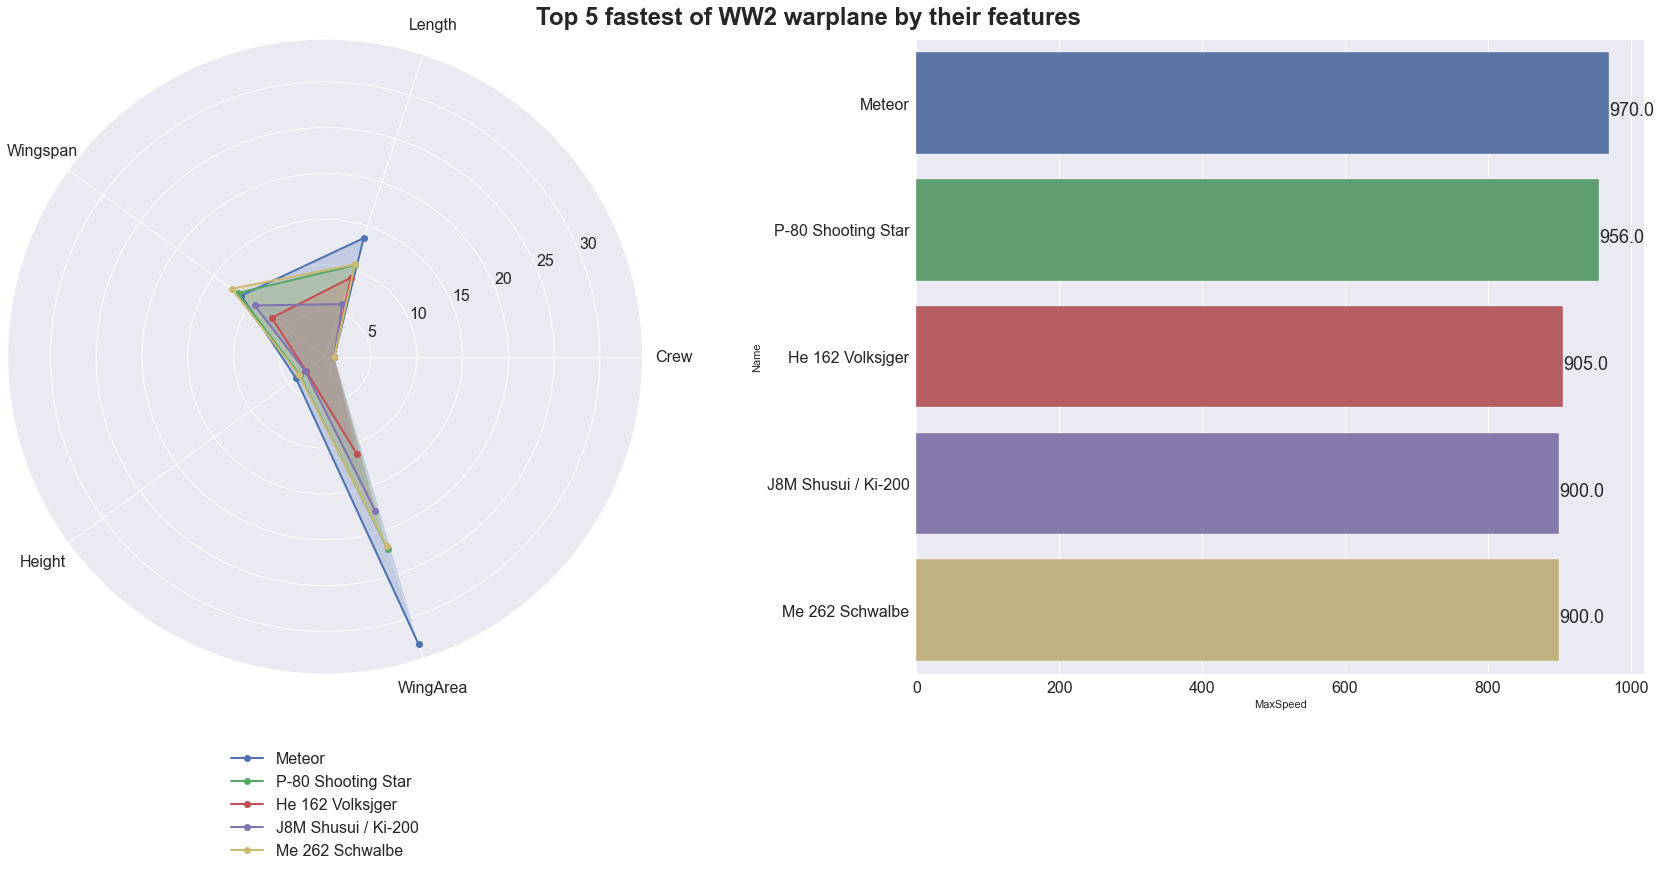

In [97]:
plt.figure(figsize=(16,8))

radar_chart(values=ww2aircraft_df_top_5["Name"])

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 1
graph_1 = sns.barplot(data = ww2aircraft_df_top_5, 
            x = "MaxSpeed", 
            y = "Name")

plt.yticks(fontsize= 16)    
plt.xticks(fontsize= 16)
show_values_on_bars(graph_1, "h", 0.3)

plt.suptitle('Top 5 fastest of WW2 warplane by their features', 
             fontsize=24, 
             fontweight="semibold",
            )

plt.tight_layout()
plt.savefig('images/image10.png', bbox_inches = "tight")
plt.show()

<a id='part4-10'></a>
### 4.10 Define a sunburst graph to make a correlation among essential features of WW2 warplanes

In [98]:
define_columns = ['Country','Manufacturer', 'PrimaryRole', 'Name', 'State']
ww2aircraft_df_donut = ww2aircraft_df.groupby(define_columns).size().reset_index(name='count')
ww2aircraft_df_donut = ww2aircraft_df_donut.sort_values(by = "count", ascending=True)

In [99]:
fig = px.sunburst(ww2aircraft_df_donut, 
                  path= define_columns ,
                  values='count',
                  title = "WW2 warplanes Correlation Graph"
                 )
fig.update_layout(height=1000, width=990)
pio.write_image(fig, "images/image11.png")
fig.show()

<a id='part4-11'></a>
### 4.11 Draw a WordCloud to show the names of WW2 warplanes

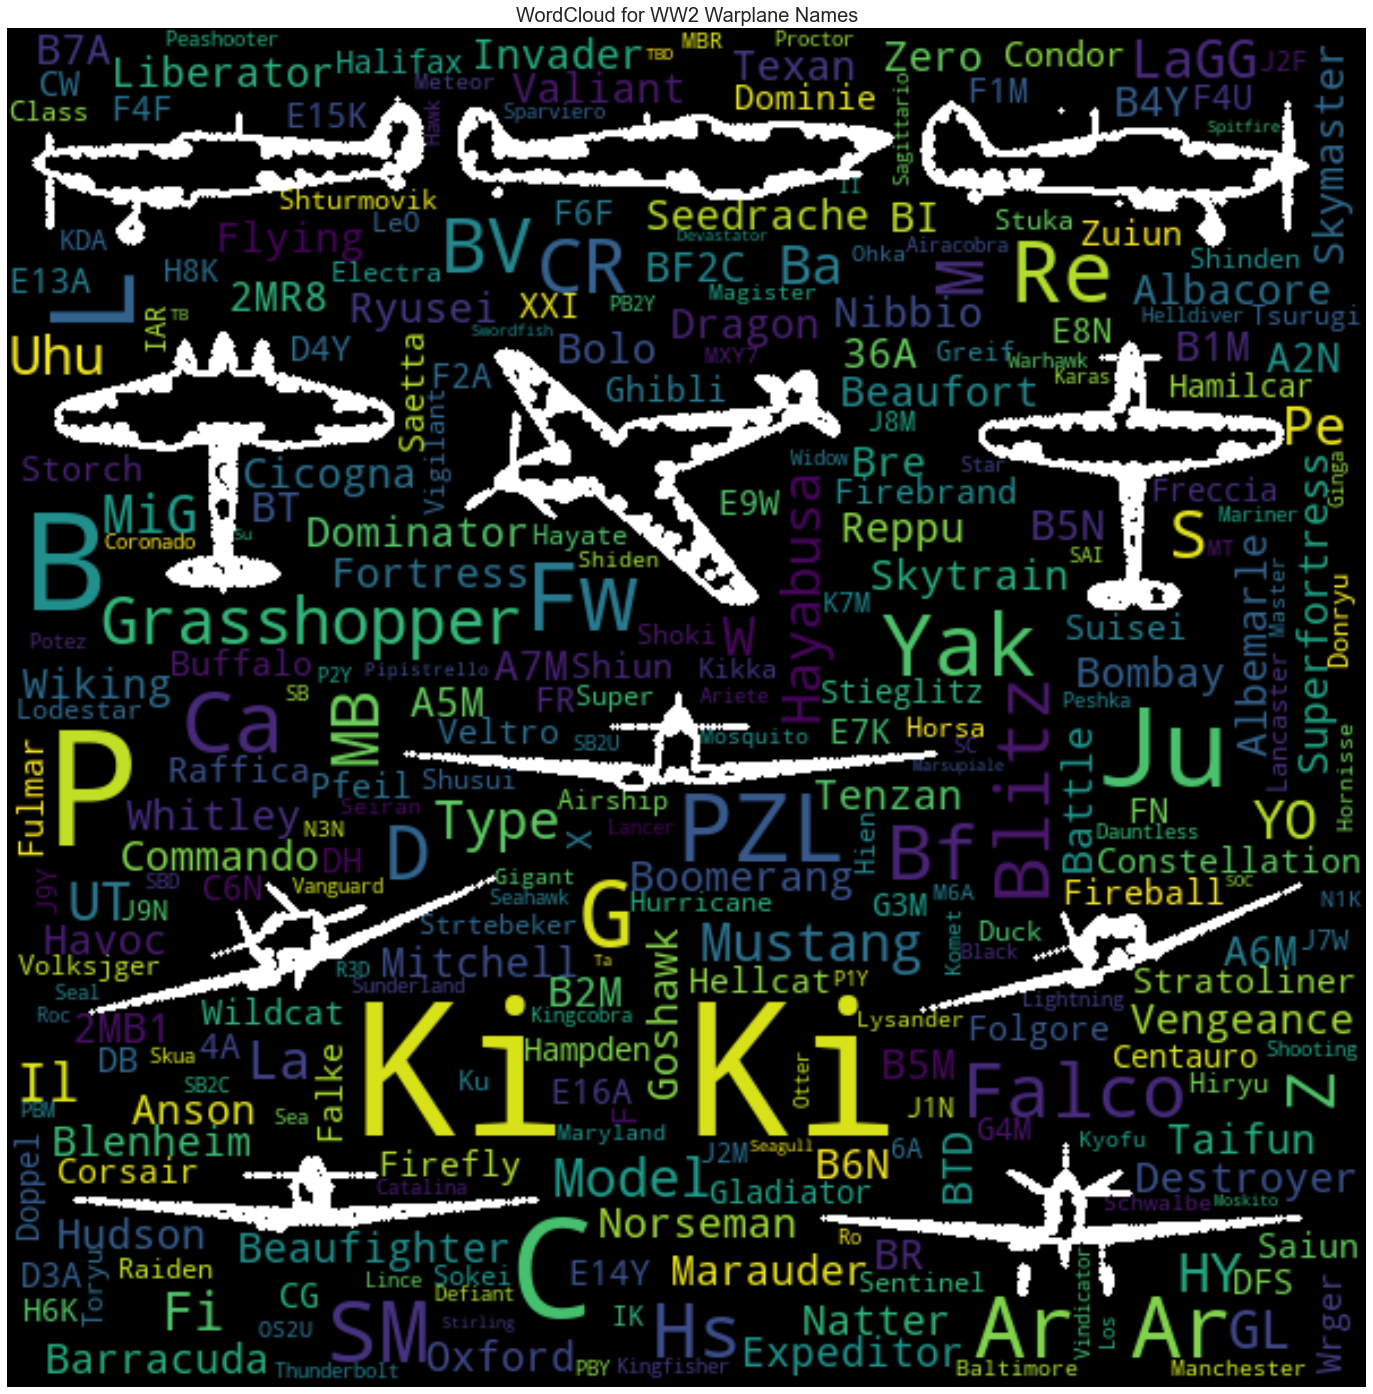

In [100]:
plt.figure(figsize=[25, 25])

image = Image.open("images/w2-planes.jpg")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(ww2aircraft_df['Name']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for WW2 Warplane Names', fontsize=20)
plt.savefig('images/image12.png')
plt.show()